Exploratory Data Analysis of the Dataset

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#loading in the data using pandas
data_feat = pd.read_csv("bank_transaction_features.csv") 
data_label = pd.read_csv("bank_transaction_labels.csv") 

In [5]:
data_feat.head(10) #Displaying the first 10 rows

,bank_transaction_id,bank_transaction_description,bank_transaction_amount,bank_transaction_type
0,21786195,citylink,-13.80,MPO
1,21786196,citylink,-13.14,DEB
2,21786197,1Jul19 OYSTER,-36.98,DEB
3,21786198,travelodge,-75.73,MPO
4,21786199,6Jul19 RINGGO,-37.86,CSH
5,21786200,SUNDRY DEBIT CONTACTLESS CAMDEN PARKING,-34.79,DEB
6,21786201,stgcoach,-7.26,DEB
7,21786202,trainline,-26.71,DEB
8,21786203,Fin: CMT UK LTD Cash at Transact,-36.25,CSH
9,21786204,OYSTER,-21.80,DEB


In [6]:
data_label.head(10) #Displaying the first 10 rows

,bank_transaction_id,bank_transaction_category,bank_transaction_dataset
0,21786195,TRAVEL,TRAIN
1,21786196,TRAVEL,TRAIN
2,21786197,TRAVEL,TRAIN
3,21786198,TRAVEL,TRAIN
4,21786199,TRAVEL,TRAIN
5,21786200,TRAVEL,TRAIN
6,21786201,TRAVEL,TRAIN
7,21786202,TRAVEL,TRAIN
8,21786203,TRAVEL,TRAIN
9,21786204,TRAVEL,TRAIN


In [21]:
data_combined = pd.merge(data_label, data_feat) #combining the two datasets

In [22]:
data_combined.head(10)

,bank_transaction_id,bank_transaction_category,bank_transaction_dataset,bank_transaction_description,bank_transaction_amount,bank_transaction_type
0,21786195,TRAVEL,TRAIN,citylink,-13.80,MPO
1,21786196,TRAVEL,TRAIN,citylink,-13.14,DEB
2,21786197,TRAVEL,TRAIN,1Jul19 OYSTER,-36.98,DEB
3,21786198,TRAVEL,TRAIN,travelodge,-75.73,MPO
4,21786199,TRAVEL,TRAIN,6Jul19 RINGGO,-37.86,CSH
5,21786200,TRAVEL,TRAIN,SUNDRY DEBIT CONTACTLESS CAMDEN PARKING,-34.79,DEB
6,21786201,TRAVEL,TRAIN,stgcoach,-7.26,DEB
7,21786202,TRAVEL,TRAIN,trainline,-26.71,DEB
8,21786203,TRAVEL,TRAIN,Fin: CMT UK LTD Cash at Transact,-36.25,CSH
9,21786204,TRAVEL,TRAIN,OYSTER,-21.80,DEB


Let us first clean the dataset by removing any duplicate rows or null values:

In [26]:
duplicate_rows_df = data_combined[data_combined.duplicated()] #check for duplicate 
print('Number of duplicate rows: ', duplicate_rows_df.shape) 

Number of duplicate rows:  (0, 6)


The above tells us there is no duplicate rows to remove. Next, checking for null values:

In [27]:
print(data_combined.isnull().sum())

bank_transaction_id             0
bank_transaction_category       0
bank_transaction_dataset        0
bank_transaction_description    0
bank_transaction_amount         0
bank_transaction_type           0
dtype: int64


Clearly, there is also no null values in any of the columns, which is great news.

In [28]:
data_combined.describe()

,bank_transaction_id,bank_transaction_amount
count,1.250000e+04,12500.000000
mean,2.226077e+07,-19.613017
std,9.391952e+05,15.060147
min,2.178620e+07,-102.590000
25%,2.178932e+07,-28.022500
50%,2.179244e+07,-19.040000
75%,2.179557e+07,-4.687500
max,2.414033e+07,-0.320000


We can see from the cell above that there is a mean bank transaction amount of 19, with a standard deviation of around 15.

In [25]:
data_combined.describe(include=np.object) #Displays descriptive statistics for columns with text strings

,bank_transaction_category,bank_transaction_dataset,bank_transaction_description,bank_transaction_type
count,12500,12500,12500,12500
unique,5,2,9474,6
top,ACCOMMODATION_AND_MEALS,TRAIN,nan,DEB
freq,3765,10000,131,4678


We can see here that there are 5 unique bank transaction categories (Travel, Accommodation and meals, Bank or finance charges, Motor expenses, insurance), with accommodation and meals coming up the most frequently. 
As for the bank transaction description, we can see that almost all of them are unique, with 'NaN' coming up the most often. This is unsurprising, as we would expect people to enter in different descriptions, and we would also expect the most common frequent response would be not to enter anything. 
Regarding the bank transaction type, we can see that there are 6 unique types (MPO, DEB, CSH, CHG, DD, FPO) with debit card coming up most frequently at around one third of the time. 

Let us do a histogram plot for each of: bank transaction data, bank transaction amount, and bank transaction type.

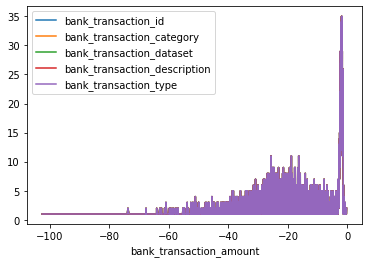

In [34]:
data_combined.groupby('bank_transaction_amount').count().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B76FBC4040>,
      dtype=object)

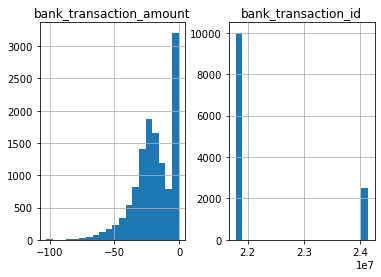

In [36]:
data_combined.hist(bins = 20)

From the above histogram and line plot, we can see that for the bank transaction amount, there are high amounts of transactions that are low in value (sub 10 pounds). Surprisingly, there is a steep drop from 10 pounds onwards, peaking again at around 25 pounds. This suggests that people will most commonly either transfer a tiny amount of money (<10), or a 'medium' amount of money (around 25 pounds). Higher transfer amounts over 50 then slowly decrease in frequency with magnitude, which is to be expected.

Lets break this down into further categories:

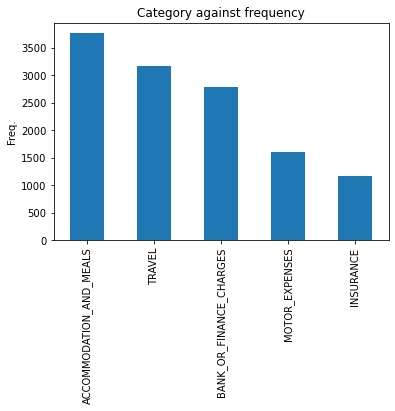

In [63]:
plt.title('Category against frequency')
plt.ylabel('Freq.')
data_combined['bank_transaction_category'].value_counts().plot(kind='bar')

We can see from the above that accommodation and meals come up the most often, followed by travel, bank or finance, motor expenses, then insurance. 

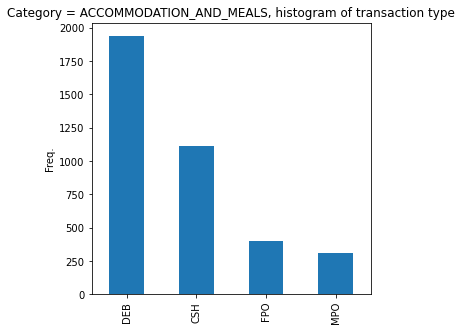

In [64]:
plt.title('Category = ACCOMMODATION_AND_MEALS, histogram of transaction type')
plt.ylabel('Freq.')
data_combined.loc[data_combined["bank_transaction_category"] == "ACCOMMODATION_AND_MEALS", "bank_transaction_type"].value_counts().nlargest(6).plot(kind='bar', figsize=(5,5))


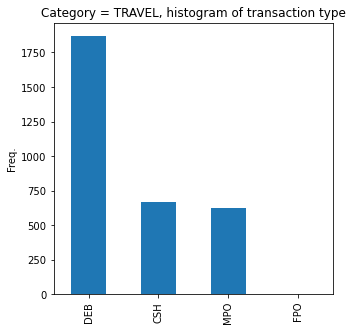

In [65]:
plt.title('Category = TRAVEL, histogram of transaction type')
plt.ylabel('Freq.')
data_combined.loc[data_combined["bank_transaction_category"] == "TRAVEL", "bank_transaction_type"].value_counts().nlargest(6).plot(kind='bar', figsize=(5,5))


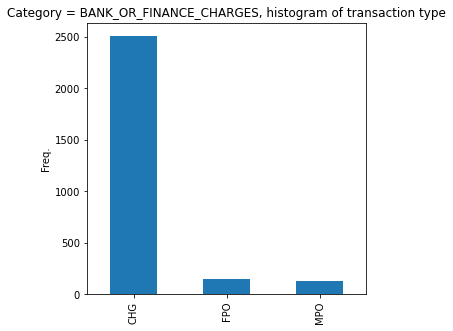

In [66]:
plt.title('Category = BANK_OR_FINANCE_CHARGES, histogram of transaction type')
plt.ylabel('Freq.')
data_combined.loc[data_combined["bank_transaction_category"] == "BANK_OR_FINANCE_CHARGES", "bank_transaction_type"].value_counts().nlargest(6).plot(kind='bar', figsize=(5,5))


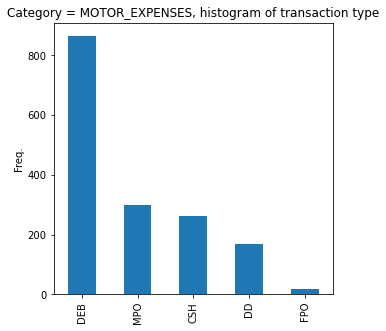

In [67]:
plt.title('Category = MOTOR_EXPENSES, histogram of transaction type')
plt.ylabel('Freq.')
data_combined.loc[data_combined["bank_transaction_category"] == "MOTOR_EXPENSES", "bank_transaction_type"].value_counts().nlargest(6).plot(kind='bar', figsize=(5,5))


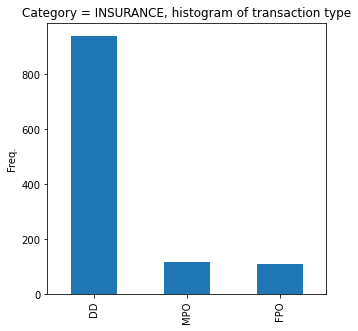

In [68]:
plt.title('Category = INSURANCE, histogram of transaction type')
plt.ylabel('Freq.')
data_combined.loc[data_combined["bank_transaction_category"] == "INSURANCE", "bank_transaction_type"].value_counts().nlargest(6).plot(kind='bar', figsize=(5,5))


From the above plots, we can see that debit card is the most common type of transaction type used for motor expenses, accomodation and travel, whilst for insurance it is direct debit by far, and for bank or finances charges it was simply 'CHG'/charge. 

Travel and Accommodation and Meals had similar histograms, with cash coming up as 2nd most frequent type in both. 
Bank and finance charges seemed to be the odd one out, as it had 'CHG' being the highest in frequency by far, which rarely is seen in other categories. 

Motor expenses follows a similar trend to travel and accomodation/meals, having debit card as the highest in frequency, however 'MPO'/mobile payment online is the second most frequent, with cash coming third.

Insurance is also an odd one out, with 'DD'/direct debit being the highest in frequency, which is rarely seen in the other category types, with MPO following second.

We can also conclude that 'FPO' seems to be used the least out of all the categories, always being at least third or lower down in frequency across all the categories.


Lets now look into the difference in transaction amounts across the different categories:

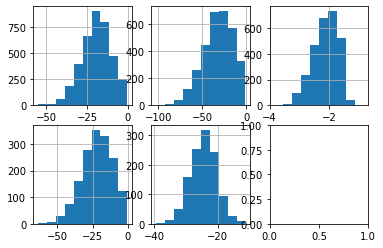

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=3)
data_combined.loc[data_combined["bank_transaction_category"] == "ACCOMMODATION_AND_MEALS", "bank_transaction_amount"].hist(ax=axes[0,0])
data_combined.loc[data_combined["bank_transaction_category"] == "TRAVEL", "bank_transaction_amount"].hist(ax=axes[0,1])
data_combined.loc[data_combined["bank_transaction_category"] == "BANK_OR_FINANCE_CHARGES", "bank_transaction_amount"].hist(ax=axes[0,2])
data_combined.loc[data_combined["bank_transaction_category"] == "MOTOR_EXPENSES", "bank_transaction_amount"].hist(ax=axes[1,0])
data_combined.loc[data_combined["bank_transaction_category"] == "INSURANCE", "bank_transaction_amount"].hist(ax=axes[1,1])

Accommodation and Meals - seems to be similar to a Guassian distribution, with mean at 20 pounds, and std. of around 10 pounds.

Travel - more of a skewed Gaussian to the right, with mean at 30 pounds.

Bank or finance charges - Gaussian-like, with mean at 2 pounds.

Motor Expenses - Very similar to the accommodation and meals histogram

Insurance - Gaussian centered at 25 pounds, again shares similarity to motor expenses and accommodation/meals

In [95]:
data_combined.loc[data_combined["bank_transaction_dataset"] == 'TRAIN'].describe()

,bank_transaction_id,bank_transaction_amount
count,1.000000e+04,10000.000000
mean,2.179119e+07,-20.073671
std,2.886896e+03,15.475279
min,2.178620e+07,-102.590000
25%,2.178869e+07,-28.582500
50%,2.179119e+07,-19.610000
75%,2.179369e+07,-4.490000
max,2.179619e+07,-0.320000


In [97]:
data_combined.loc[data_combined["bank_transaction_dataset"] == 'VAL'].describe()

,bank_transaction_id,bank_transaction_amount
count,2.500000e+03,2500.000000
mean,2.413908e+07,-17.770400
std,7.218322e+02,13.112316
min,2.413783e+07,-73.770000
25%,2.413845e+07,-25.965000
50%,2.413908e+07,-16.805000
75%,2.413970e+07,-5.207500
max,2.414033e+07,-0.430000


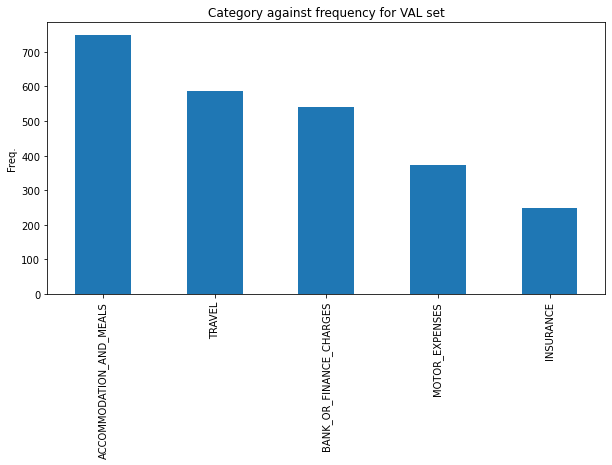

In [103]:
plt.title('Category against frequency for VAL set')
plt.ylabel('Freq.')
data_combined.loc[data_combined["bank_transaction_dataset"] == 'VAL', 'bank_transaction_category'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

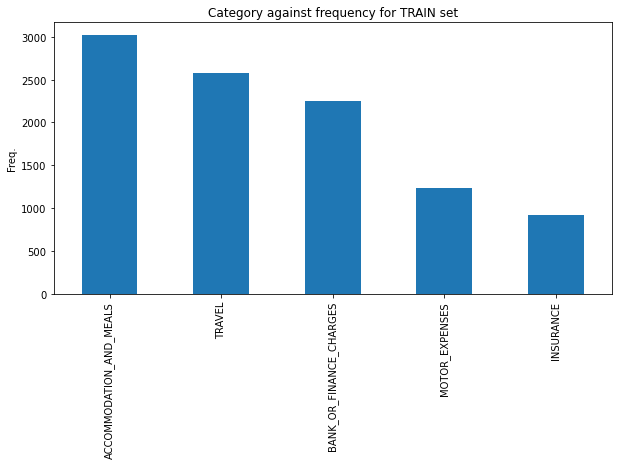

In [104]:
plt.title('Category against frequency for TRAIN set')
plt.ylabel('Freq.')
data_combined.loc[data_combined["bank_transaction_dataset"] == 'TRAIN', 'bank_transaction_category'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

From the above plots and table comparisons, we can see that the training and validation sets are roughly similar in mean, standard deviation, and frequency (proportion wise).